# 1. Importing important libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 2. Loading dataset


In [2]:
df= pd.read_excel("mobile_details.xlsx")

In [3]:
df.head()

,Name,Price,ram,Rom,display,HD,Front_Camera_Resolution_MP,Back/Rare Camera,Battery
0,POCO,6499,4 GB RAM,64 GB ROM,16.56 cm,Yes,5.0,8MP Dual Rear Camera,5000.0
1,POCO,6499,4 GB RAM,64 GB ROM,16.56 cm,Yes,5.0,8MP Dual Rear Camera,5000.0
2,POCO,5499,2 GB RAM,32 GB ROM,16.56 cm,Yes,5.0,8MP Dual Camera,5000.0
3,vivo,13999,6 GB RAM,128 GB ROM,16.71 cm,Yes,8.0,50MP + 2MP,5000.0
4,vivo,13999,6 GB RAM,128 GB ROM,16.71 cm,Yes,8.0,50MP + 2MP,5000.0


# 3. Data Description


**1. Name**: The name of the mobile phone.

**2. Price**: The cost of the mobile phone in Rupees.

**3. RAM**: The amount of Random Access Memory, which affects the phone's performance and multitasking capabilities.

**4. ROM**: The internal storage capacity, where the operating system, apps, and user data are stored.


**5. Display**: Information about the screen, such as size in cm

**6. HD**: Likely represents the screen resolution, such as "High Definition," yes or no

**7. Front_Camera_Resolution_MP**: The resolution of the front-facing camera in megapixels.

**8. Back/Rear Camera**: Specifications of the main or rear-facing camera, including resolution, number of lenses, and camera features.

**9. Battery**: The capacity of the battery, typically measured in milliampere-hours (mAh), affecting the phone's battery life.


# 4. Basic imformation about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        918 non-null    object 
 1   Price                       918 non-null    int64  
 2   ram                         918 non-null    object 
 3   Rom                         918 non-null    object 
 4   display                     918 non-null    object 
 5   HD                          918 non-null    object 
 6   Front_Camera_Resolution_MP  683 non-null    float64
 7   Back/Rare Camera            918 non-null    object 
 8   Battery                     913 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 64.7+ KB


##### The dataset contains 918 rows and 9 columns. Two columns are of float data type, one is of integer, and six are of object5

# 5. Data Cleaning

In [5]:
#The 'RAM' column contains the term 'GB RAM,' which is causing it to be classified as an object data type.
#However, t is actually of integer datatype.We will remove 'GB RAM' and convert the datatype to int
df["ram"]= df["ram"].str.replace("GB RAM", "").astype("int")

##### And the same thing is happening with the 'ROM' column, so we will perform the same steps for this column as well.

In [6]:
df["Rom"] =  df["Rom"].str.replace("GB ROM", "").astype("int")

##### The 'display' column contains the word 'cm,' which is causing it to be categorized as an object. Therefore, we will remove this word and convert the datatype to float.

In [7]:
df["display"] =  df["display"].str.replace(" cm", "").astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        918 non-null    object 
 1   Price                       918 non-null    int64  
 2   ram                         918 non-null    int32  
 3   Rom                         918 non-null    int32  
 4   display                     918 non-null    float64
 5   HD                          918 non-null    object 
 6   Front_Camera_Resolution_MP  683 non-null    float64
 7   Back/Rare Camera            918 non-null    object 
 8   Battery                     913 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 57.5+ KB


In [10]:
df["Back/Rare Camera"]= df["Back/Rare Camera"].apply(lambda x: x.strip())

##### Now, all columns in our dataset have the correct datatypes



# 6. Let's check for null values in our dataset

In [11]:
df.isnull().sum()/len(df)*100

Name                           0.000000
Price                          0.000000
ram                            0.000000
Rom                            0.000000
display                        0.000000
HD                             0.000000
Front_Camera_Resolution_MP    25.599129
Back/Rare Camera               0.000000
Battery                        0.544662
dtype: float64

##### There are two columns in the dataset: 'Front_Camera_Resolution_MP' and 'Battery', which contain null values. In the 'Front_Camera_Resolution_MP' column, the proportion of null values exceeds 25%. While it is possible to impute these values using the mean or median, it has been decided to assign them to a separate category instead of pursuing imputation. Additionally, in the 'Battery' column, the percentage of null values is less than 1%. Consequently, it has been determined that the rows with missing 'Battery' values, comprising less than 1% of the dataset, will be removed.

In [12]:
df["Front_Camera_Resolution_MP"]=  df["Front_Camera_Resolution_MP"].fillna(0).astype("int")

In [13]:
df.dropna(inplace  = True)

In [14]:
df.isnull().sum()/len(df)*100

Name                          0.0
Price                         0.0
ram                           0.0
Rom                           0.0
display                       0.0
HD                            0.0
Front_Camera_Resolution_MP    0.0
Back/Rare Camera              0.0
Battery                       0.0
dtype: float64

##### We can observe that there are no null values present in our dataset.

In [15]:
df[df["Price"] ==0]

,Name,Price,ram,Rom,display,HD,Front_Camera_Resolution_MP,Back/Rare Camera,Battery
390,MOTOROLA,0,4,64,16.26,Yes,13,50MP + 8MP + 2MP,5000.0


##### One row in the price column contains zero, so we will remove that row

In [16]:
df.drop([390] , inplace = True)

In [17]:
df.reset_index(inplace= True, drop= True )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        912 non-null    object 
 1   Price                       912 non-null    int64  
 2   ram                         912 non-null    int32  
 3   Rom                         912 non-null    int32  
 4   display                     912 non-null    float64
 5   HD                          912 non-null    object 
 6   Front_Camera_Resolution_MP  912 non-null    int32  
 7   Back/Rare Camera            912 non-null    object 
 8   Battery                     912 non-null    float64
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 53.6+ KB


# 7.  Let's print the unique values from our dataset.

In [19]:
for i in df.columns:
    print("*"*20, i , "*"*20)
    print(df[i].value_counts())

******************** Name ********************
REDMI       204
realme      189
vivo        143
SAMSUNG     134
POCO         84
MOTOROLA     62
OnePlus      55
OPPO         41
Name: Name, dtype: int64
******************** Price ********************
9999      31
14999     24
17999     24
15999     24
18999     24
          ..
11599      1
19189      1
15249      1
16399      1
109999     1
Name: Price, Length: 322, dtype: int64
******************** ram ********************
4      267
8      266
6      217
3       53
12      49
2       48
16       7
128      3
10       2
Name: ram, dtype: int64
******************** Rom ********************
128    458
64     237
256    127
32      83
512      4
6        3
Name: Rom, dtype: int64
******************** display ********************
16.51    138
16.76    100
17.02     85
16.94     79
16.71     65
16.33     50
16.56     45
16.66     44
16.36     37
16.59     34
16.26     33
16.54     28
16.64     21
17.04     21
17.07     20
17.25     20
17.12  

# 8. Let's separate X and Y.

In [20]:
x=df.drop("Price", axis=1)
y= df["Price"]


In [21]:

y

0        6499
1        6499
2        5499
3       13999
4       13999
        ...  
907     11479
908    109999
909     12999
910     12999
911     19999
Name: Price, Length: 912, dtype: int64

# 9. Let's perform encoding

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


In [23]:
ct= ColumnTransformer([("oencoder", OrdinalEncoder(),["Name" , "HD", "Back/Rare Camera"])], remainder="passthrough")

In [24]:
x= ct.fit_transform(x)


In [25]:
x

array([[3.000e+00, 1.000e+00, 7.800e+01, ..., 1.656e+01, 5.000e+00,
        5.000e+03],
       [3.000e+00, 1.000e+00, 7.800e+01, ..., 1.656e+01, 5.000e+00,
        5.000e+03],
       [3.000e+00, 1.000e+00, 7.700e+01, ..., 1.656e+01, 5.000e+00,
        5.000e+03],
       ...,
       [6.000e+00, 1.000e+00, 2.800e+01, ..., 1.651e+01, 1.600e+01,
        5.000e+03],
       [6.000e+00, 1.000e+00, 2.800e+01, ..., 1.651e+01, 1.600e+01,
        5.000e+03],
       [3.000e+00, 1.000e+00, 7.100e+01, ..., 1.694e+01, 1.600e+01,
        5.000e+03]])

# 10.  Let's visualize the correlation between X and Y using a heatmap.

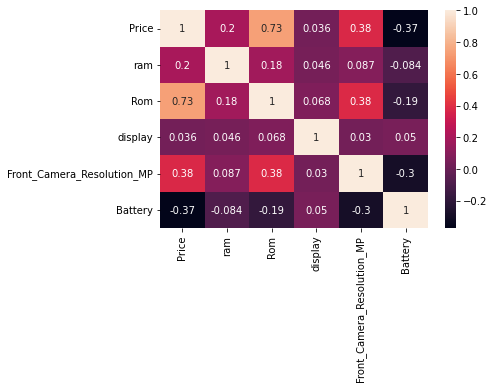

In [26]:
sns.heatmap(df.corr(), annot= True)
plt.show()

# 11. Distribution of the target column.

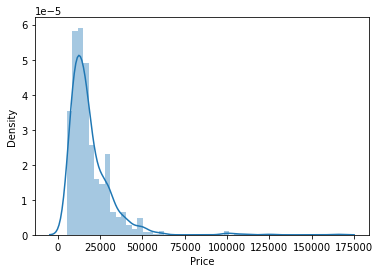

In [27]:
sns.distplot(df["Price"])
plt.show()

##### "Looking at the distribution plot, we can see that the target column is skewed towards the right side. To handle this, we'll use a log transformation on the target column.

#### We're doing this because the log transformation can help balance out the data and make it easier for our model to work with."

In [28]:
y= np.log(y)

# 12. Let's build a model using the Random Forest algorithm.

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x, y, random_state= 123, test_size= 0.20)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [31]:
r2_train=[]
r2_test= []
rmse= []
def model_build(model):
    model.fit(xtrain, ytrain)
    ytrain_pred = model.predict(xtrain)
    ytest_pred= model.predict(xtest)
    a= r2_score(ytrain, ytrain_pred)
    r2_train.append(a)
    b= r2_score(ytest, ytest_pred)
    r2_test.append(b)
    rms= round(np.sqrt((mean_squared_error(ytest, ytest_pred))),2)
    rmse.append(rms)
    print(model)
    print("Training Accuracy", a)
    print("Testing Accuracy", b)   
    print("RMSE", rms)

In [32]:
model_build(rf)

RandomForestRegressor()
Training Accuracy 0.9832354118686777
Testing Accuracy 0.9373997536591705
RMSE 0.12


##### I employed the Random Forest model. During training, it achieved an accuracy of around 98.4%. When put to the test with new data, it reached an accuracy of about 94.4%. The Root Mean Squared Error (RMSE) was roughly 0.12.

In [33]:
df.head()

,Name,Price,ram,Rom,display,HD,Front_Camera_Resolution_MP,Back/Rare Camera,Battery
0,POCO,6499,4,64,16.56,Yes,5,8MP Dual Rear Camera,5000.0
1,POCO,6499,4,64,16.56,Yes,5,8MP Dual Rear Camera,5000.0
2,POCO,5499,2,32,16.56,Yes,5,8MP Dual Camera,5000.0
3,vivo,13999,6,128,16.71,Yes,8,50MP + 2MP,5000.0
4,vivo,13999,6,128,16.71,Yes,8,50MP + 2MP,5000.0


In [34]:
a={"Name": "vivo", "ram": 6, "Rom": 128, "display": 16.71, "HD": "Yes", "Front_Camera_Resolution_MP": 8, "Back/Rare Camera": "50MP + 2MP",
"Battery": 5000}

In [35]:
a= pd.DataFrame([a])

In [36]:
a

,Name,ram,Rom,display,HD,Front_Camera_Resolution_MP,Back/Rare Camera,Battery
0,vivo,6,128,16.71,Yes,8,50MP + 2MP,5000


In [38]:
a= ct.transform(a)

In [39]:
a

array([[7.000e+00, 1.000e+00, 4.700e+01, 6.000e+00, 1.280e+02, 1.671e+01,
        8.000e+00, 5.000e+03]])

In [41]:
a=rf.predict(a)

In [42]:
np.exp(a)

array([15739.97105633])

In [43]:
a={"Name": "vivo", "ram": 3, "Rom": 32, "display": 16.54, "HD": "Yes", "Front_Camera_Resolution_MP": 5, "Back/Rare Camera": "13MP + 2MP",
"Battery": 5000}

In [44]:
a= pd.DataFrame([a])
a= ct.transform(a)
a=rf.predict(a)

In [45]:
np.exp(a)

array([11668.28358584])

In [46]:
import pickle

In [47]:
pickle.dump(rf, open("mobilePricemodel.pkl", "wb"))

In [48]:
pickle.dump(ct, open("ctmobile.pkl", "wb"))

In [49]:
pickle.dump(df, open("mobiledata.pkl", "wb"))